Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce (1).csv

✅ File '9. Customer Segmentation in E-commerce (1).csv' uploaded successfully!


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


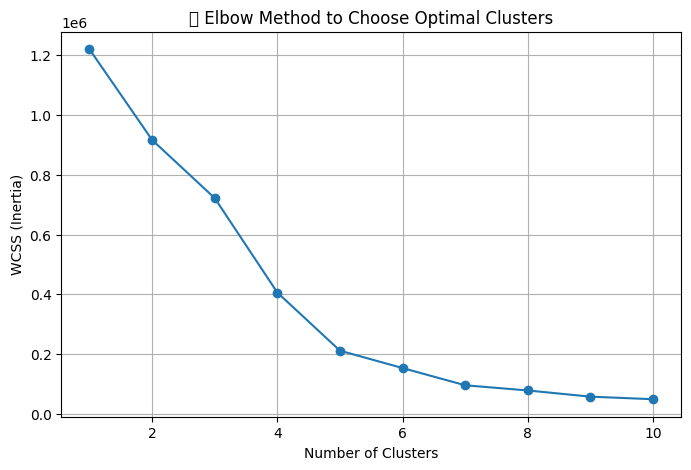

<ipython-input-6-0fa03f7fdc7d>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


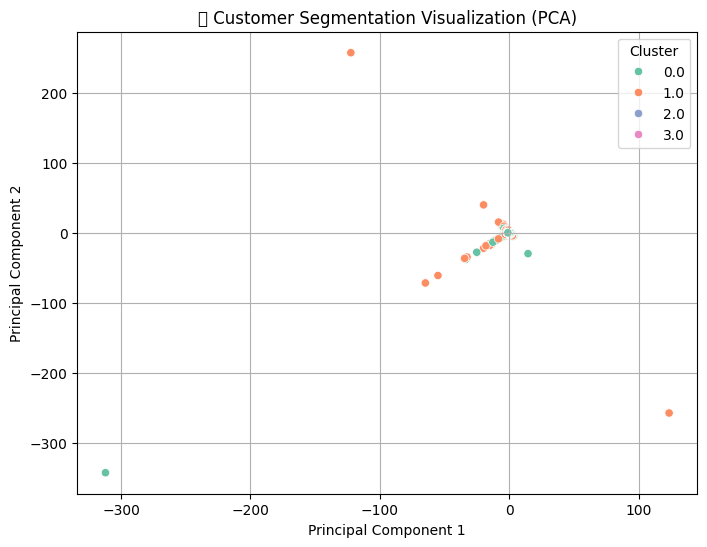

In [6]:
# 📦 Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import files
import io

# 📁 Step 1: Upload CSV File
uploaded = files.upload()

# 📊 Step 2: Read the uploaded CSV file
for filename in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"\n✅ File '{filename}' uploaded successfully!")

# 🔍 Step 3: Data Preprocessing
df_cleaned = df.dropna()  # remove rows with missing values
df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])  # keep numeric columns

# 📏 Step 4: Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 📉 Step 5: Elbow Method to determine optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('📌 Elbow Method to Choose Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

# 🧠 Step 6: Apply KMeans Clustering
optimal_k = 4  # Based on Elbow Method (change if needed)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

# 🔻 Step 7: Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create a DataFrame for PCA output
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df_cleaned['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('👥 Customer Segmentation Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
